In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn
import random
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
import matplotlib as mpt


df =pd.read_csv('https://raw.githubusercontent.com/Talisew/551first-assignment/master/merged_data.csv',sep = ',',low_memory=False)
df

,Unnamed: 0,region_name,date,hospitalized_new,symptom:Angular cheilitis,symptom:Aphonia,symptom:Crackles,symptom:Dysautonomia,symptom:Hemolysis,symptom:Rectal pain,symptom:Shallow breathing,symptom:Ventricular fibrillation
0,0,Hawaii,2020-03-09,0.0,373.072786,739.814500,363.518623,156.780356,156.780356,156.780356,570.717331,156.780356
1,1,Hawaii,2020-03-16,0.0,330.136609,578.544838,434.771957,156.780356,156.780356,156.780356,964.279767,156.780356
2,2,Hawaii,2020-03-23,12.0,363.979065,418.656502,492.787595,156.780356,156.780356,156.780356,850.320478,156.780356
3,3,Hawaii,2020-03-30,7.0,453.419840,327.489070,415.663631,156.780356,156.780356,156.780356,692.849459,156.780356
4,4,Hawaii,2020-04-06,25.0,417.390287,265.559678,306.654089,156.780356,156.780356,156.780356,512.241252,156.780356
...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,Wyoming,2020-08-24,8.0,9.934225,9.934225,9.934225,15.427805,9.934225,9.934225,9.934225,11.353400
228,228,Wyoming,2020-08-31,4.0,9.934225,9.934225,13.047254,12.268996,9.934225,12.040097,13.276153,9.934225
229,229,Wyoming,2020-09-07,9.0,10.300463,9.934225,12.589455,13.367712,11.582299,9.934225,10.071564,9.934225
230,230,Wyoming,2020-09-14,15.0,9.934225,9.934225,9.934225,14.512208,9.934225,11.261840,9.934225,9.934225


 **Task 2** Trial

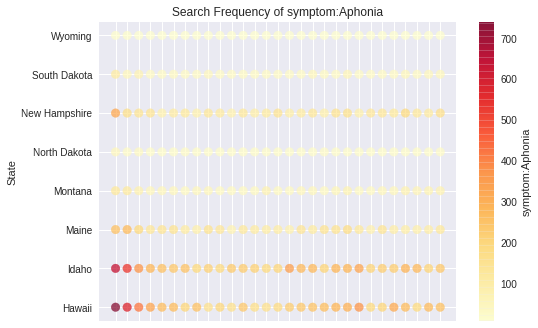

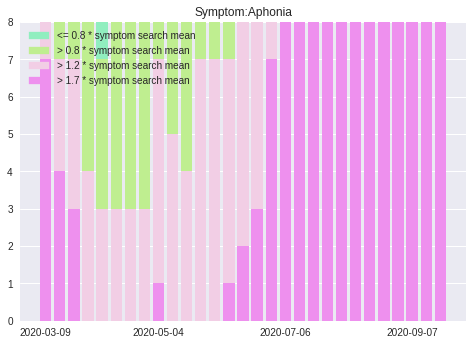

In [2]:
# the followings are four graphs of search frequency of different symptons.
#No.1


cm = plt.cm.get_cmap('YlOrRd')

x='date'
y='region_name'

plt.style.use('seaborn')

pt = df.plot.scatter(x,y,s=75,c='symptom:Aphonia', alpha=0.7,cmap=cm);#color='DarkBlue',cmap='viridis'
pt.set_xticklabels(["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07"])
pt.set_title('Search Frequency of symptom:Aphonia')
pt.set_ylabel('State')
pt.set_xlabel('Date')
plt.show()

# Create a df store the specific symptom data sort by date
count_df = df[['date']].copy()
count_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = count_df[count_df['date']==row['date']].index.values[0]
  count_df.at[index, row['region_name']] = row['symptom:Aphonia']

for (col_name,col) in count_df.iteritems():
    if col_name != 'date':
      for index,row in count_df.iterrows():
        if row[col_name]>1.7* col.mean():
          count_df.at[index,col_name]=1
        elif row[col_name]> 1.2*col.mean():
          count_df.at[index,col_name]=2
        elif row[col_name]> 0.8*col.mean():
          count_df.at[index,col_name]=3
        elif row[col_name]<= 0.8*col.mean():
          count_df.at[index,col_name]=4
        else:
          count_df.at[index,col_name]=4
 
count_region_date = df[['date']].copy()
count_region_date.drop_duplicates(inplace=True)

A_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
B_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
C_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
D_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in count_df.iterrows():
  for (col_name,_) in count_df.iteritems():
    if row[col_name]==1:
      A_list[index]=A_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==2:
      B_list[index]=B_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==3:
      C_list[index]=C_list[index]+1
    elif row[col_name]==4:
      D_list[index]=D_list[index]+1


name_list =["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07","",""]


back_list=[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
plt.bar(range(len(A_list)), back_list,label='Lowest',fc = '#90eebf')
plt.bar(range(len(A_list)), C_list,label='Low',fc = '#bfee90')
plt.bar(range(len(A_list)), A_list, label='High',fc = '#ee90ee')

plt.bar(range(len(A_list)), B_list,bottom=A_list,tick_label=name_list, label='Medium',fc = '#f2cee5')
plt.title("Symptom:Aphonia")



the_patch = mpatches.Patch(color='#90eebf', label='<= 0.8 * symptom search mean')
the1_patch = mpatches.Patch(color='#bfee90', label='> 0.8 * symptom search mean')
the2_patch = mpatches.Patch(color='#f2cee5', label='> 1.2 * symptom search mean')
the3_patch = mpatches.Patch(color='#ee90ee', label='> 1.7 * symptom search mean')
plt.legend(handles=[the_patch,the1_patch,the2_patch,the3_patch])

plt.show()

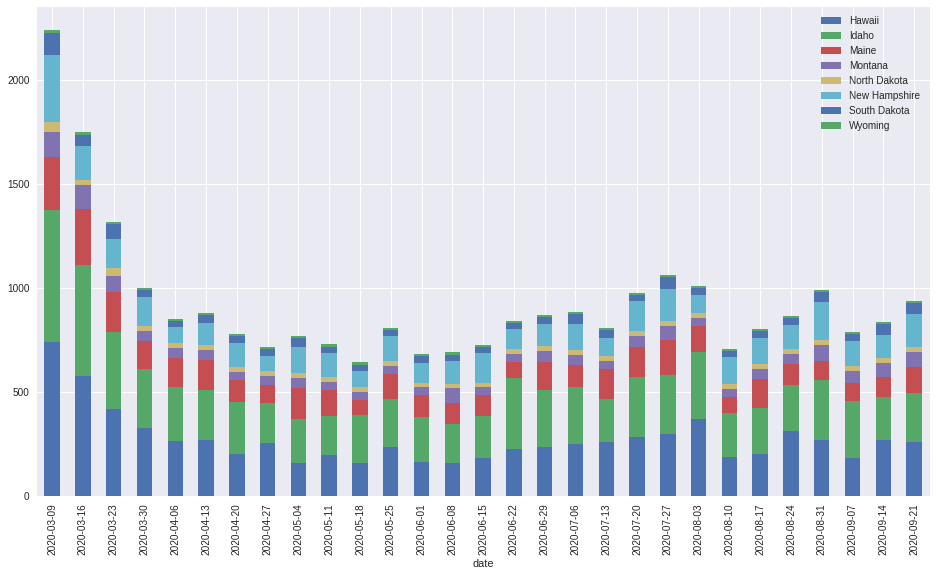

In [3]:
# Create a df for distribution
dis_df = df[['date']].copy()
dis_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = dis_df[count_df['date']==row['date']].index.values[0]
  dis_df.at[index, row['region_name']] = row['symptom:Aphonia']


dis_df.plot.bar(x='date',stacked=True,figsize=(16,9))


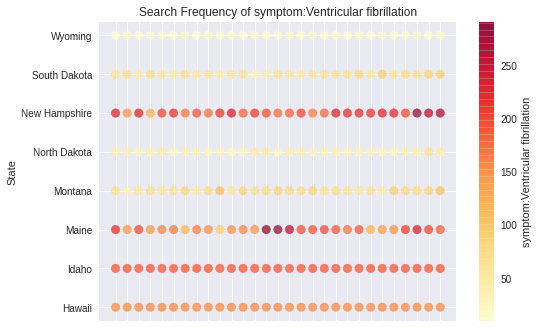

Text(0.5, 1.0, 'Symptom:Ventricular fibrillation')

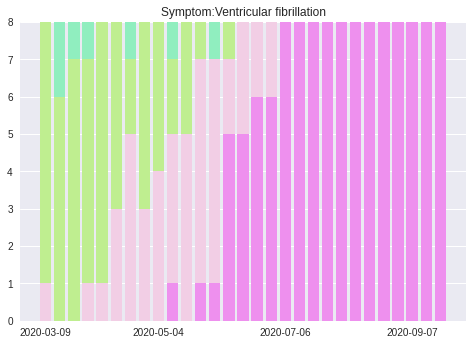

In [4]:
#No.2
cm = plt.cm.get_cmap('YlOrRd')

x='date'
y='region_name'

plt.style.use('seaborn')

pt = df.plot.scatter(x,y,s=75,c='symptom:Ventricular fibrillation', alpha=0.7,cmap=cm);#color='DarkBlue',cmap='viridis'
pt.set_xticklabels(["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07"])
pt.set_title('Search Frequency of symptom:Ventricular fibrillation')
pt.set_ylabel('State')
pt.set_xlabel('Date')
plt.show()

# Create a df store the specific symptom data sort by date
count_df = df[['date']].copy()
count_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = count_df[count_df['date']==row['date']].index.values[0]
  count_df.at[index, row['region_name']] = row['symptom:Ventricular fibrillation']

for (col_name,col) in count_df.iteritems():
    if col_name != 'date':
      for index,row in count_df.iterrows():
        if row[col_name]>1.7* col.mean():
          count_df.at[index,col_name]=1
        elif row[col_name]> 1.2*col.mean():
          count_df.at[index,col_name]=2
        elif row[col_name]> 0.8*col.mean():
          count_df.at[index,col_name]=3
        elif row[col_name]<= 0.8*col.mean():
          count_df.at[index,col_name]=4
        else:
          count_df.at[index,col_name]=4
 
count_region_date = df[['date']].copy()
count_region_date.drop_duplicates(inplace=True)

A_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
B_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
C_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
D_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in count_df.iterrows():
  for (col_name,_) in count_df.iteritems():
    if row[col_name]==1:
      A_list[index]=A_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==2:
      B_list[index]=B_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==3:
      C_list[index]=C_list[index]+1
    elif row[col_name]==4:
      D_list[index]=D_list[index]+1


name_list =["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07","",""]


back_list=[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
plt.bar(range(len(A_list)), back_list,label='Lowest',fc = '#90eebf')
plt.bar(range(len(A_list)), C_list,label='Low',fc = '#bfee90')
plt.bar(range(len(A_list)), A_list, label='High',fc = '#ee90ee')

plt.bar(range(len(A_list)), B_list,bottom=A_list,tick_label=name_list, label='Medium',fc = '#f2cee5')

plt.title("Symptom:Ventricular fibrillation")

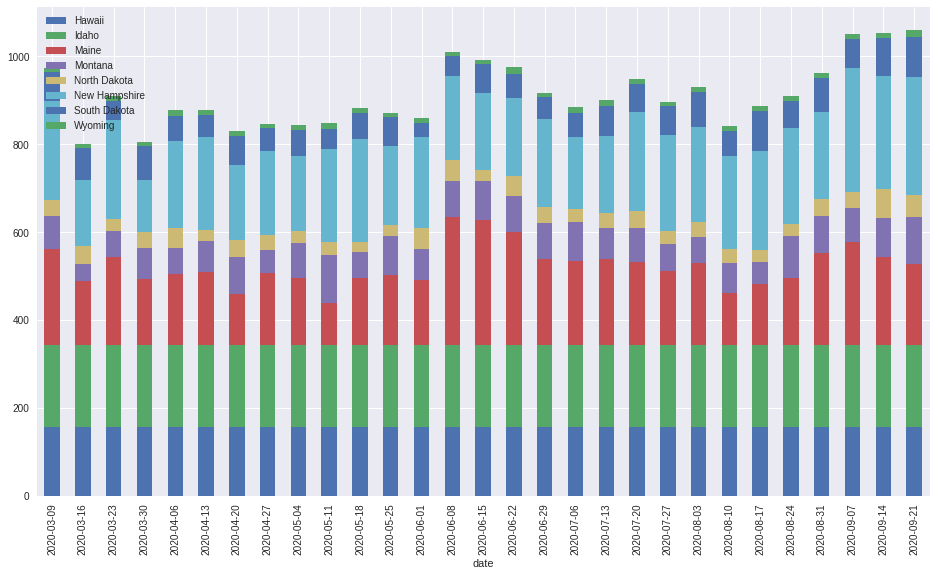

In [5]:
# Create a df for distribution
dis_df = df[['date']].copy()
dis_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = dis_df[count_df['date']==row['date']].index.values[0]
  dis_df.at[index, row['region_name']] = row['symptom:Ventricular fibrillation']


dis_df.plot.bar(x='date',stacked=True,figsize=(16,9))


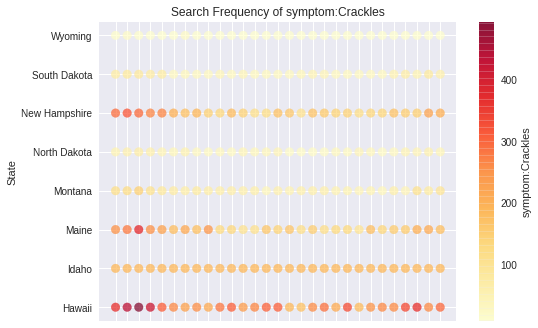

Text(0.5, 1.0, 'Symptom:Crackles')

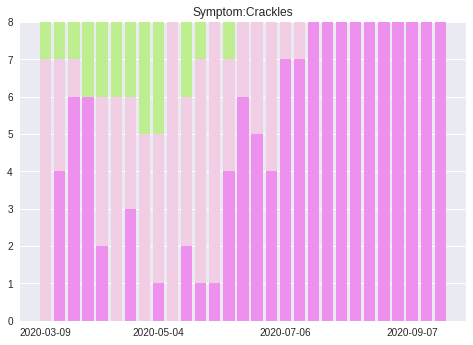

In [6]:
#No.3
cm = plt.cm.get_cmap('YlOrRd')

x='date'
y='region_name'

plt.style.use('seaborn')

pt = df.plot.scatter(x,y,s=75,c='symptom:Crackles', alpha=0.7,cmap=cm);#color='DarkBlue',cmap='viridis'
pt.set_xticklabels(["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07"])
pt.set_title('Search Frequency of symptom:Crackles')
pt.set_ylabel('State')
pt.set_xlabel('Date')
plt.show()



# Create a df store the specific symptom data sort by date
count_df = df[['date']].copy()
count_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = count_df[count_df['date']==row['date']].index.values[0]
  count_df.at[index, row['region_name']] = row['symptom:Crackles']


for (col_name,col) in count_df.iteritems():
    if col_name != 'date':
      for index,row in count_df.iterrows():
        if row[col_name]>1.7* col.mean():
          count_df.at[index,col_name]=1
        elif row[col_name]> 1.2*col.mean():
          count_df.at[index,col_name]=2
        elif row[col_name]> 0.8*col.mean():
          count_df.at[index,col_name]=3
        elif row[col_name]<= 0.8*col.mean():
          count_df.at[index,col_name]=4
        else:
          count_df.at[index,col_name]=4
 
count_region_date = df[['date']].copy()
count_region_date.drop_duplicates(inplace=True)

A_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
B_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
C_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
D_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in count_df.iterrows():
  for (col_name,_) in count_df.iteritems():
    if row[col_name]==1:
      A_list[index]=A_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==2:
      B_list[index]=B_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==3:
      C_list[index]=C_list[index]+1
    elif row[col_name]==4:
      D_list[index]=D_list[index]+1


name_list =["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07","",""]


back_list=[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
plt.bar(range(len(A_list)), back_list,label='Lowest',fc = '#90eebf')
plt.bar(range(len(A_list)), C_list,label='Low',fc = '#bfee90')
plt.bar(range(len(A_list)), A_list, label='High',fc = '#ee90ee')

plt.bar(range(len(A_list)), B_list,bottom=A_list,tick_label=name_list, label='Medium',fc = '#f2cee5')
plt.title("Symptom:Crackles")



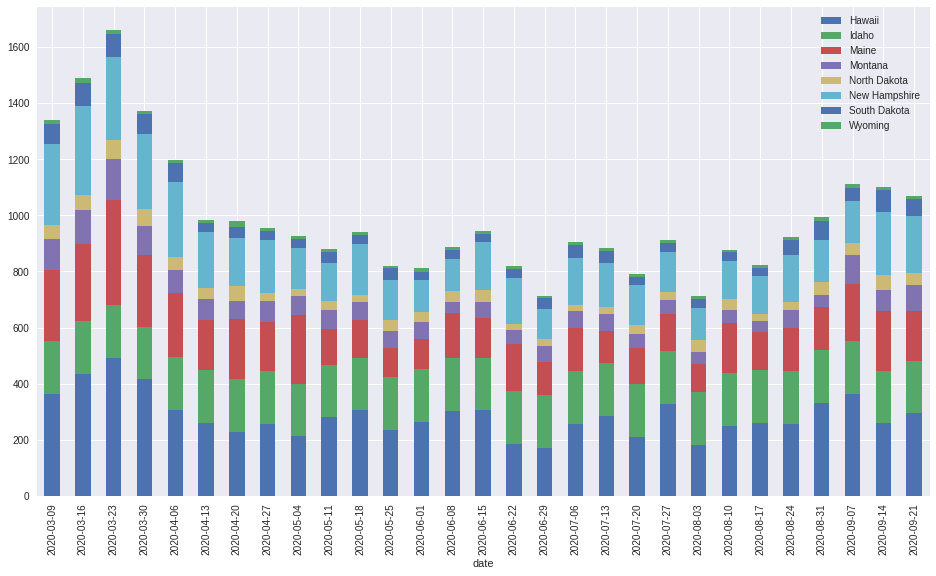

In [7]:
# Create a df for distribution
dis_df = df[['date']].copy()
dis_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = dis_df[count_df['date']==row['date']].index.values[0]
  dis_df.at[index, row['region_name']] = row['symptom:Crackles']


dis_df.plot.bar(x='date',stacked=True,figsize=(16,9))


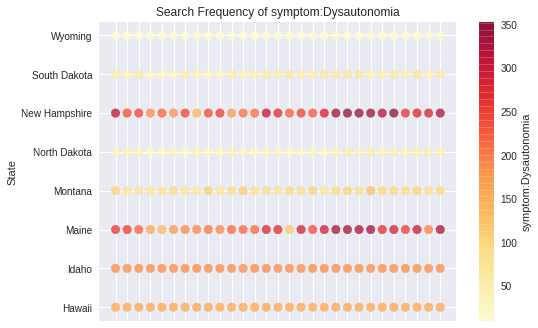

Text(0.5, 1.0, 'Symptom:Dysautonomia')

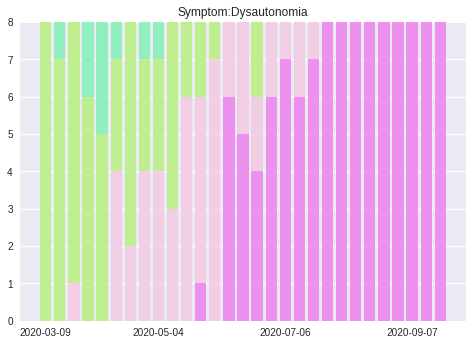

In [8]:
#No.4
cm = plt.cm.get_cmap('YlOrRd')

x='date'
y='region_name'

plt.style.use('seaborn')

pt = df.plot.scatter(x,y,s=75,c='symptom:Dysautonomia', alpha=0.7,cmap=cm);#color='DarkBlue',cmap='viridis'
pt.set_xticklabels(["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07"])
pt.set_title('Search Frequency of symptom:Dysautonomia')
pt.set_ylabel('State')
pt.set_xlabel('Date')
plt.show()

# Create a df store the specific symptom data sort by date
count_df = df[['date']].copy()
count_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = count_df[count_df['date']==row['date']].index.values[0]
  count_df.at[index, row['region_name']] = row['symptom:Dysautonomia']

for (col_name,col) in count_df.iteritems():
    if col_name != 'date':
      for index,row in count_df.iterrows():
        if row[col_name]>1.7* col.mean():
          count_df.at[index,col_name]=1
        elif row[col_name]> 1.2*col.mean():
          count_df.at[index,col_name]=2
        elif row[col_name]> 0.8*col.mean():
          count_df.at[index,col_name]=3
        elif row[col_name]<= 0.8*col.mean():
          count_df.at[index,col_name]=4
        else:
          count_df.at[index,col_name]=4
 
count_region_date = df[['date']].copy()
count_region_date.drop_duplicates(inplace=True)

A_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
B_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
C_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
D_list=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for index,row in count_df.iterrows():
  for (col_name,_) in count_df.iteritems():
    if row[col_name]==1:
      A_list[index]=A_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==2:
      B_list[index]=B_list[index]+1
      C_list[index]=C_list[index]+1
    elif row[col_name]==3:
      C_list[index]=C_list[index]+1
    elif row[col_name]==4:
      D_list[index]=D_list[index]+1


name_list =["2020-03-09","","","","","","","","2020-05-04","","","","","","","","","2020-07-06","","","","","","","","","2020-09-07","",""]


back_list=[8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8]
plt.bar(range(len(A_list)), back_list,label='Lowest',fc = '#90eebf')
plt.bar(range(len(A_list)), C_list,label='Low',fc = '#bfee90')
plt.bar(range(len(A_list)), A_list, label='High',fc = '#ee90ee')

plt.bar(range(len(A_list)), B_list,bottom=A_list,tick_label=name_list, label='Medium',fc = '#f2cee5')
plt.title("Symptom:Dysautonomia")



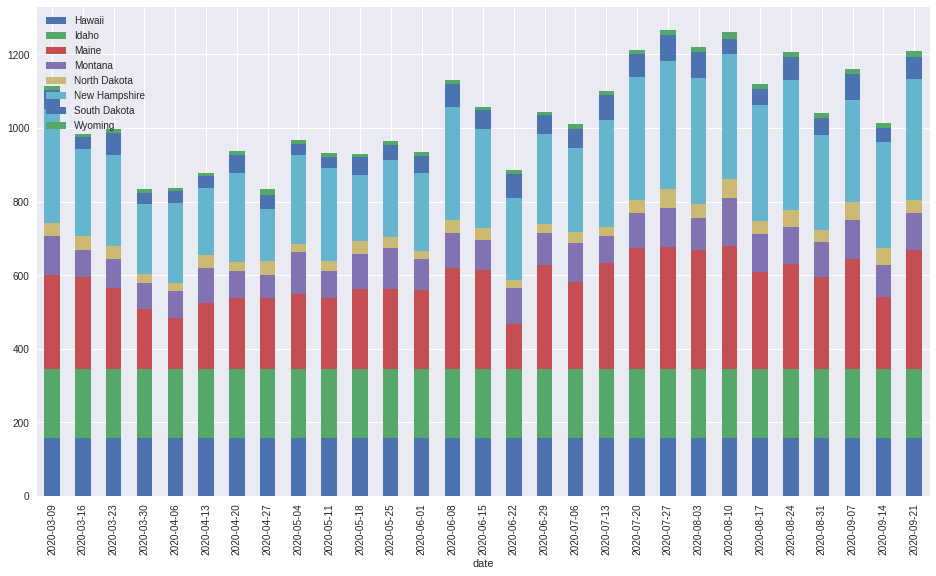

In [9]:
# Create a df for distribution
dis_df = df[['date']].copy()
dis_df.drop_duplicates(inplace=True)
for _, row in df.iterrows():
  index = dis_df[count_df['date']==row['date']].index.values[0]
  dis_df.at[index, row['region_name']] = row['symptom:Dysautonomia']


dis_df.plot.bar(x='date',stacked=True,figsize=(16,9))


I will use the PCA to cut the dimension

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
pca = PCA(n_components=2)
new_df = df.copy()
# make a new df which only store the data of symptom
new_df.drop(columns=['date','region_name','hospitalized_new','Unnamed: 0'],inplace=True)
replace_nan = SimpleImputer(missing_values=np.nan, strategy='mean')
symptom_df=replace_nan.fit_transform(new_df)


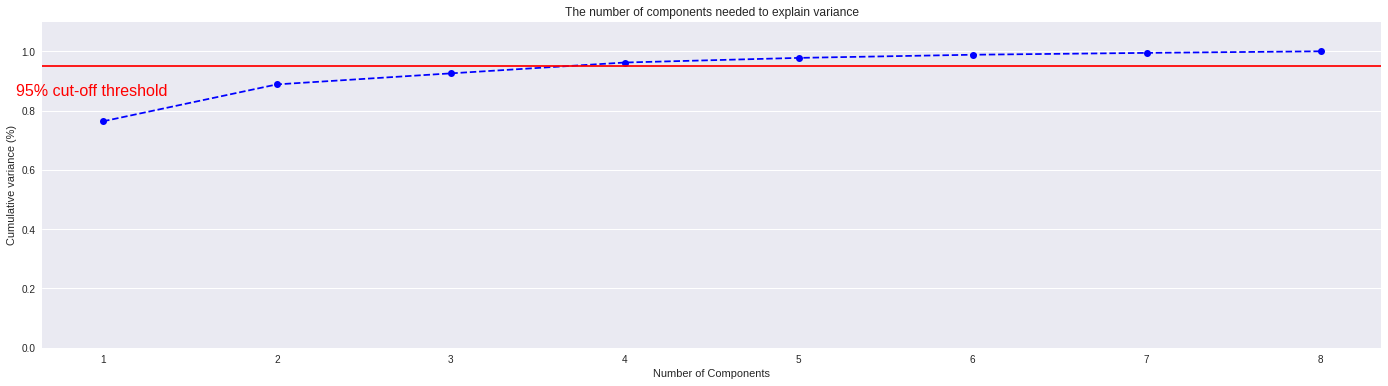

In [11]:
X_std = StandardScaler().fit_transform(symptom_df)
pca = PCA().fit(X_std)

plt.rcParams["figure.figsize"] = (24,6)

fig, ax = plt.subplots()
x1 = np.arange(1, 9, step=1)
y1 = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(x1, y1, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

So from the plot we can see the first 4 components can take most part of 95% explain variance.

So cut all other components and choose the first 4

Plot the 4 principal components 

[0.76384215 0.12453437 0.03720207 0.03655529]


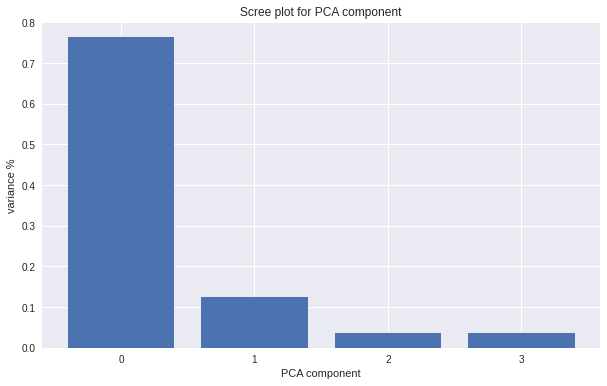

In [12]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10,6))
plt.bar(features, pca.explained_variance_ratio_)
plt.title("Scree plot for PCA component")
plt.xlabel('PCA component')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

I will choose component=2 because they cover most of parts

Text(0.5, 1.0, 'Plot of the PCA reduced data')

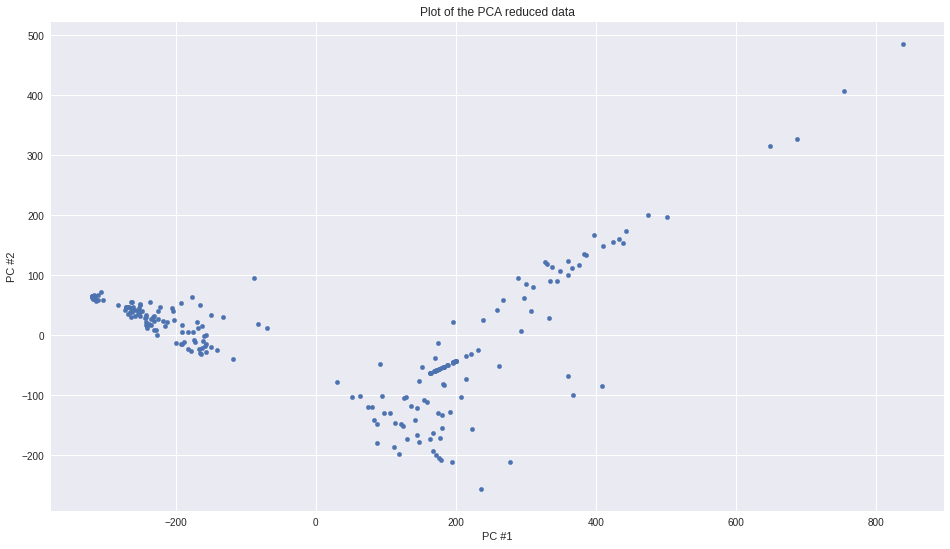

In [13]:
# Loading the data from sklearn
from sklearn import datasets
#To do this, I will treat each date and region as a data point.
#since we have 29 weeks and 16 regions, so we have 29*16=464 data point, each data point has 121 features (121 symptons)
#So we will get a matrix (464,121)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
pca = PCA(n_components=2)
new_df = df.copy()
# make a new df which only store the data of symptom
new_df.drop(columns=['date','region_name','hospitalized_new','Unnamed: 0'],inplace=True)
replace_nan = SimpleImputer(missing_values=np.nan, strategy='mean')
symptom_df=replace_nan.fit_transform(new_df)
Y=symptom_df
pca.fit(symptom_df)
symptom_reduced_np=pca.transform(symptom_df)  
symptom_df_reduced=pd.DataFrame(data=symptom_reduced_np[:,:2],columns=['PC #1','PC #2'])
#symptom_df1=pd.DataFrame(data=symptom_df[:,:2],columns=['PC #1','PC #2'])


reduce_pt=symptom_df_reduced.plot.scatter(x='PC #1',y='PC #2',figsize=(16,9))
reduce_pt.set_title("Plot of the PCA reduced data")
#symptom_df1.plot.scatter(x='PC #1',y='PC #2',figsize=(16,9))




Text(0.5, 1.0, 'Plot of the PCA standardized data')

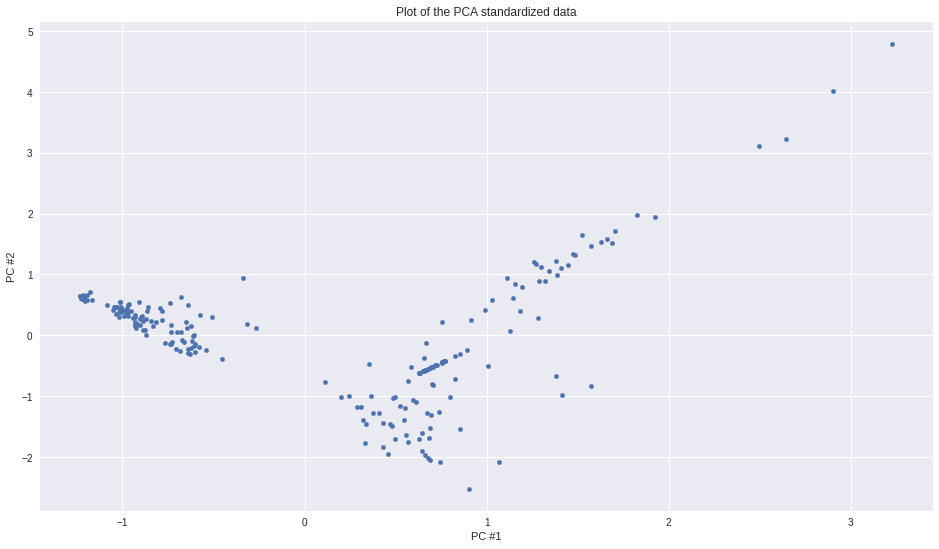

In [14]:
#Then we standardize the scaler.
symptom_std=StandardScaler().fit_transform(symptom_df_reduced)
pca.fit_transform(symptom_std)

std_plot=pd.DataFrame(data=symptom_std[:,:2],columns=['PC #1','PC #2'])
std_pt=std_plot.plot.scatter(x='PC #1',y='PC #2',figsize=(16,9))
std_pt.set_title("Plot of the PCA standardized data")


1856.0
566.917872879941
380.85102894787724
327.87893844403203
272.18514063257675
226.54021120655244
191.02443735330422
173.69097860015384


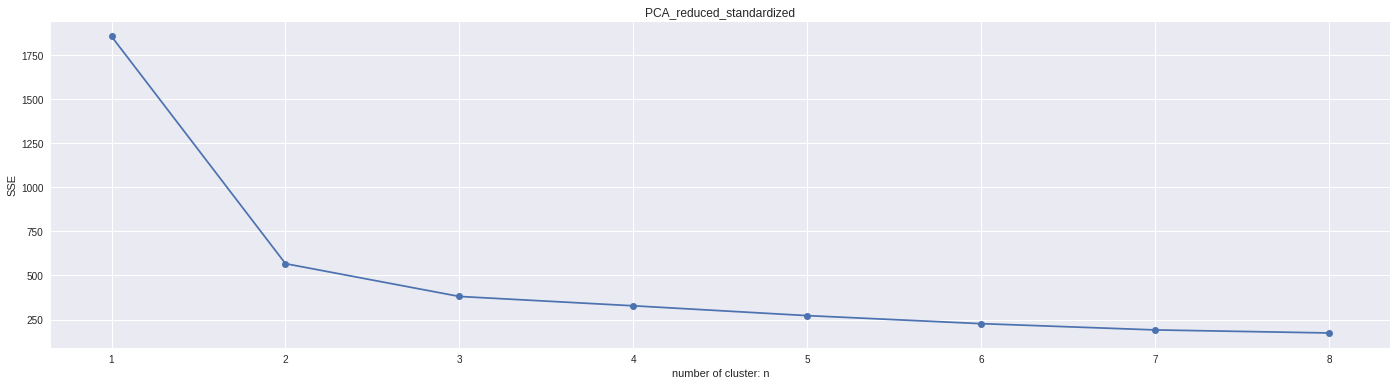

In [15]:

SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X_std)
    SSE.append(estimator.inertia_)
    print(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.title('PCA_reduced_standardized')
plt.xlabel('number of cluster: n')
plt.show()

1856.0
566.917872879941
380.85102894787724
323.8171315106268
270.0635353460985
226.54021120655244
191.02443735330422
175.83324148921085


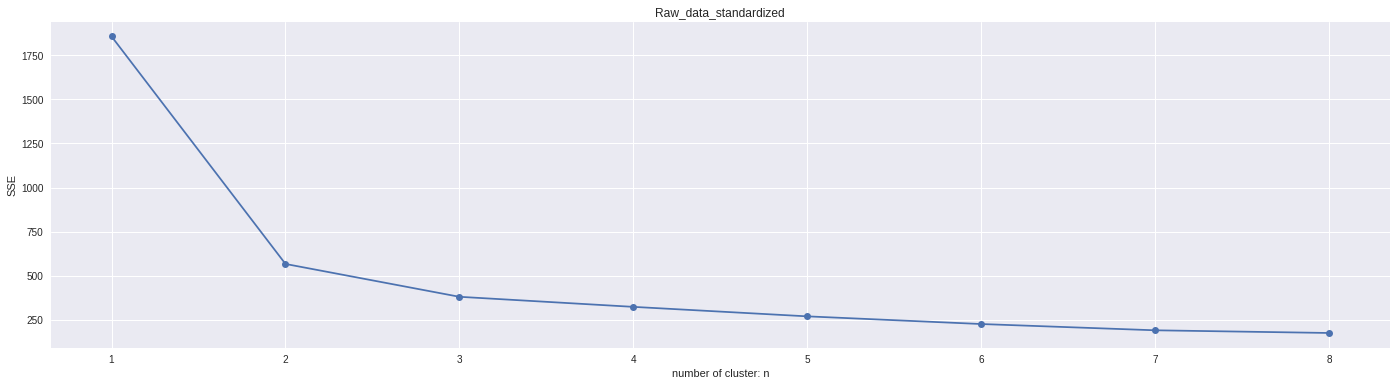

In [16]:

symptom_df_std=StandardScaler().fit_transform(symptom_df)
SSE = [] 
for k in range(1,9):
    estimator = KMeans(n_clusters=k) 
    estimator.fit(symptom_df_std)
    SSE.append(estimator.inertia_)
    print(estimator.inertia_)
X = range(1,9)
plt.title('Raw_data_standardized')
plt.xlabel('number of cluster: n')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

As we can seen from the above graph, I will choose cluster=3 to do this KMeans

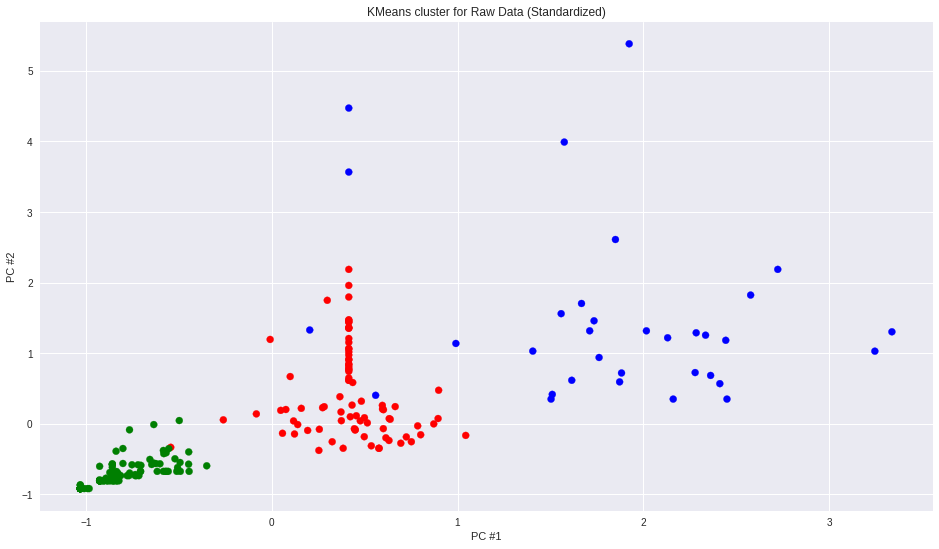

In [17]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])
# standardize the raw data
#symptom_df_std=StandardScaler().fit_transform(symptom_df)
cmap = mpt.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])
plt.figure(figsize=(16,9))
labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(symptom_df_std[:,0], symptom_df_std[:,1], c=labels,cmap=cmap)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("KMeans cluster for Raw Data (Standardized)")
plt.show()

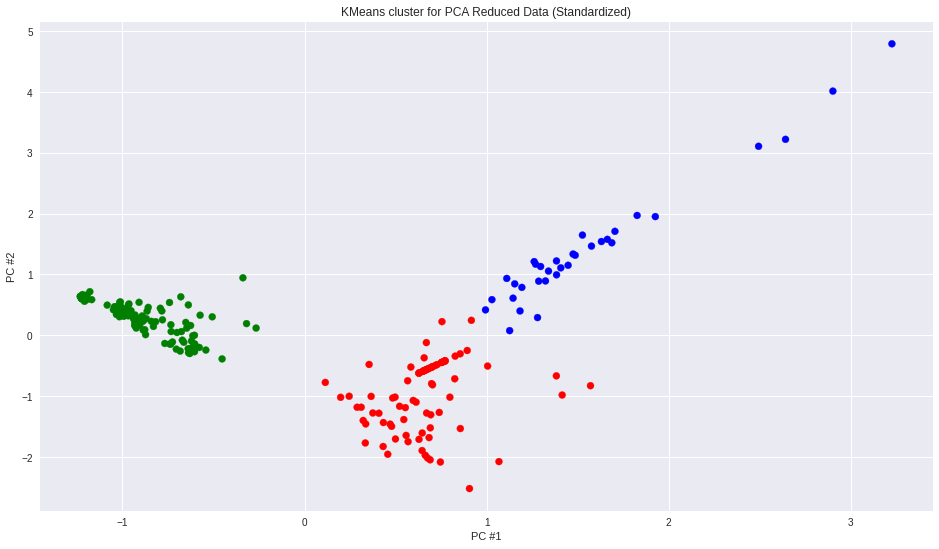

In [18]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])
cmap = mpt.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])
plt.figure(figsize=(16,9))
labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(symptom_std[:,0], symptom_std[:,1], c=labels,cmap=cmap)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("KMeans cluster for PCA Reduced Data (Standardized)")
plt.show()